# NBA Season Stats: Exploratory Data Analysis on Team Level Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

folder_name = 'figures'
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
folder_path = os.path.join(parent_dir, folder_name)

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

go_back = '../data/'

In [2]:
game_stats = pd.read_csv(go_back + 'NBA Player Box Score Stats(1950 - 2022).csv')
#Just look at data after 2008 Season
game_stats = game_stats[game_stats['Season'] >= 2008]
game_stats.head()

,Unnamed: 0,Season,Game_ID,PLAYER_NAME,Team,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
920454,148436,2008,20800392,Aaron Brooks,HOU,"DEC 20, 2008",HOU @ MIN,W,31,4,...,10.0,10.0,5.0,0.0,0.0,2.0,0.0,18,-2.0,0
920455,148435,2008,20800404,Aaron Brooks,HOU,"DEC 22, 2008",HOU @ NJN,W,37,8,...,3.0,3.0,6.0,1.0,0.0,1.0,4.0,22,19.0,0
920456,148434,2008,20800411,Aaron Brooks,HOU,"DEC 23, 2008",HOU @ CLE,L,21,3,...,4.0,4.0,3.0,0.0,1.0,0.0,0.0,10,1.0,0
920457,148433,2008,20800431,Aaron Brooks,HOU,"DEC 26, 2008",HOU @ NOH,L,17,4,...,1.0,1.0,2.0,0.0,0.0,1.0,0.0,9,2.0,0
920458,148432,2008,20800440,Aaron Brooks,HOU,"DEC 27, 2008",HOU vs. UTA,W,21,3,...,3.0,4.0,3.0,0.0,0.0,1.0,0.0,10,-3.0,0


In [3]:
stats = pd.read_csv(go_back + 'stats.csv')
stats = stats[stats['Season'] >= 2008]
stats.head()

,Unnamed: 0.1,Unnamed: 0,Season,Player,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
18758,19507,0,2008,Shareef Abdur-Rahim,PF,31.0,SAC,6.0,0.0,51.0,...,1.000,6.0,4.0,10.0,4.0,1.0,0.0,1.0,9.0,10.0
18759,19508,1,2008,Arron Afflalo,SG,22.0,DET,75.0,9.0,970.0,...,0.782,36.0,101.0,137.0,52.0,31.0,8.0,34.0,83.0,276.0
18760,19509,2,2008,Maurice Ager,SG,23.0,TOT,26.0,3.0,165.0,...,0.500,4.0,9.0,13.0,8.0,0.0,1.0,6.0,17.0,51.0
18761,19510,3,2008,Maurice Ager,SG,23.0,DAL,12.0,3.0,77.0,...,0.833,1.0,3.0,4.0,4.0,0.0,1.0,3.0,11.0,15.0
18762,19511,4,2008,Maurice Ager,SG,23.0,NJN,14.0,0.0,88.0,...,0.167,3.0,6.0,9.0,4.0,0.0,0.0,3.0,6.0,36.0


In [4]:
betting = pd.read_csv(go_back + 'betting.csv')
betting = betting[betting['season'] >= 2008]
betting.head()

,date,season,team,home/visitor,opponent,score,opponentScore,moneyLine,opponentMoneyLine,total,spread,secondHalfTotal
0,2007-10-30,2008,Utah,@,Golden State,117,96,100.0,-120.0,212.0,1.0,105.5
1,2007-10-30,2008,LA Lakers,vs,Houston,93,95,190.0,-230.0,199.0,5.0,99.0
2,2007-10-30,2008,Houston,@,LA Lakers,95,93,-230.0,190.0,199.0,-5.0,99.0
3,2007-10-30,2008,San Antonio,vs,Portland,106,97,-1400.0,900.0,189.5,-13.0,95.0
4,2007-10-30,2008,Portland,@,San Antonio,97,106,900.0,-1400.0,189.5,13.0,95.0


In [5]:
betting.isna().sum()

date                 0
season               0
team                 0
home/visitor         0
opponent             0
score                0
opponentScore        0
moneyLine            0
opponentMoneyLine    0
total                0
spread               0
secondHalfTotal      0
dtype: int64

In [6]:
lookup = pd.read_json(go_back + 'nba_lookup_table.json', orient='index')
lookup.reset_index(inplace=True)
lookup.columns = ['Abbrv', 'Team Name']
lookup

,Abbrv,Team Name
0,ATL,Atlanta
1,BOS,Boston
2,BRK,Brooklyn
3,CHI,Chicago
4,CHO,Charlotte
5,CLE,Cleveland
6,DAL,Dallas
7,DEN,Denver
8,DET,Detroit
9,GSW,Golden State


In [7]:
train_data = pd.read_csv(go_back + 'all_data_train.csv').drop(['Unnamed: 0', 'team', 'opponent', 'total', 'date', 'score', 'opponentScore', 'secondHalfTotal'], axis = 1)
for col in train_data.columns:
    if 'opp' in col:
        train_data = train_data.drop(col, axis = 1)

train_data

,moneyLine,spread,FG%,FG3%,FT%,REB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G,win%,home,outcome
0,450.0,10.0,0.507246,0.416667,0.750000,40.000000,27.000000,9.000000,6.000000,18.000000,18.000000,108.000000,1.000000,0,0
1,-600.0,-10.0,0.445946,0.214286,0.617647,36.000000,16.000000,10.000000,0.000000,16.000000,28.000000,90.000000,1.000000,1,1
2,100.0,1.5,0.384615,0.227273,0.608696,32.000000,24.000000,9.000000,5.000000,18.000000,29.000000,79.000000,0.000000,1,0
3,-280.0,-6.5,0.444444,0.625000,0.764706,33.000000,24.000000,8.000000,5.000000,9.000000,23.000000,95.000000,1.000000,1,1
4,-120.0,-1.5,0.467532,0.307692,0.642857,35.000000,17.000000,12.000000,3.000000,13.000000,27.000000,94.000000,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22491,450.0,10.0,0.444910,0.347918,0.737720,44.942308,22.557692,6.846154,4.576923,14.596154,17.730769,105.653846,0.384615,1,0
22492,550.0,11.0,0.448114,0.355769,0.773171,42.557692,24.519231,7.711538,5.076923,13.865385,20.442308,107.615385,0.307692,0,0
22493,-800.0,-11.0,0.467000,0.390255,0.789520,48.307692,23.461538,6.500000,5.423077,13.250000,18.807692,116.903846,0.750000,1,1
22494,-140.0,-3.0,0.451056,0.335192,0.733275,42.941176,23.529412,8.137255,4.960784,14.313725,18.803922,103.647059,0.372549,1,0


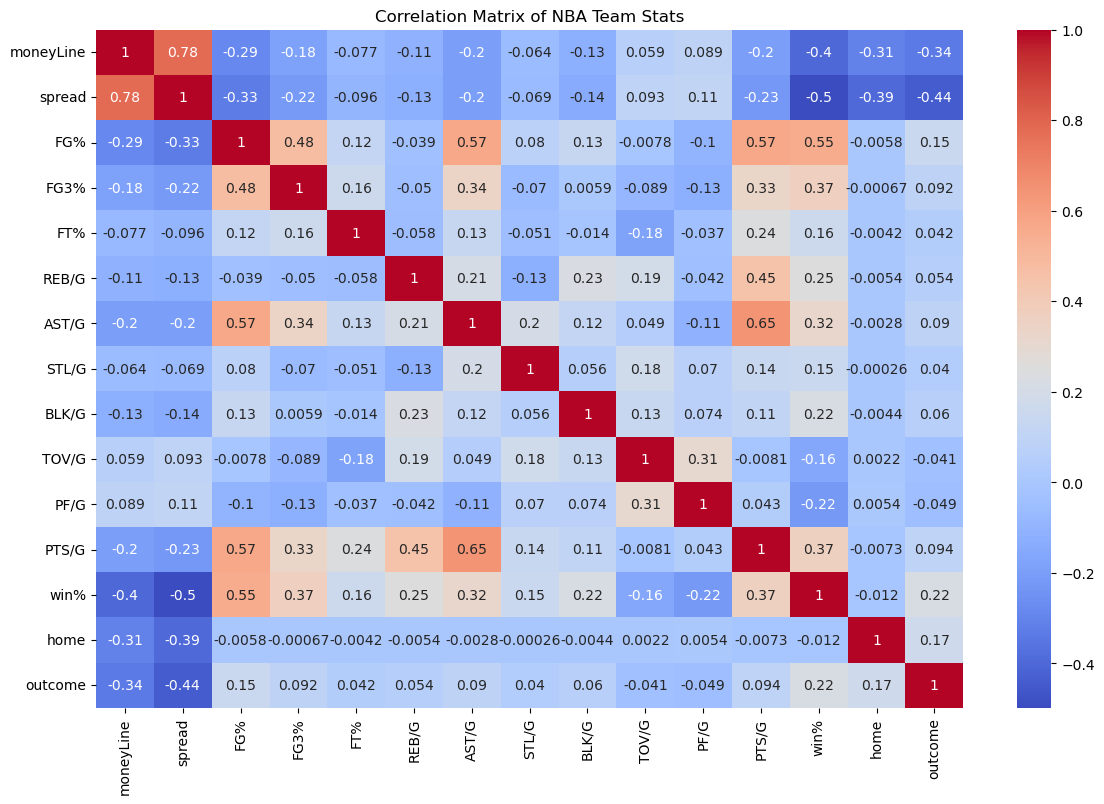

In [15]:

plt.figure(figsize=(12, 8))
corr = train_data.corr()
for col in corr.columns:
    if 'opp' in col:
        corr = corr.drop(col, axis = 1)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.title('Correlation Matrix of NBA Team Stats')
plt.savefig(f'{folder_path}/correlation_matrix.png', dpi=500)
plt.show()

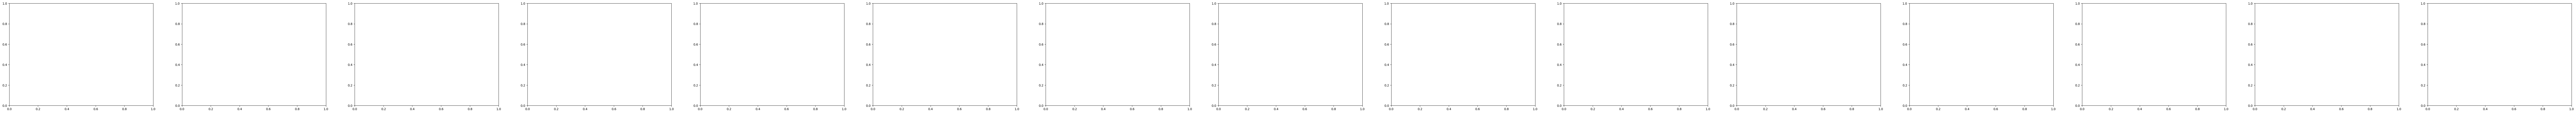

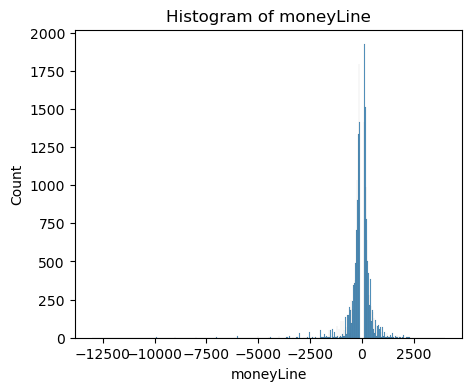

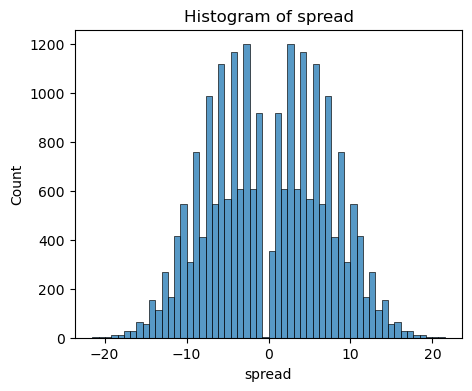

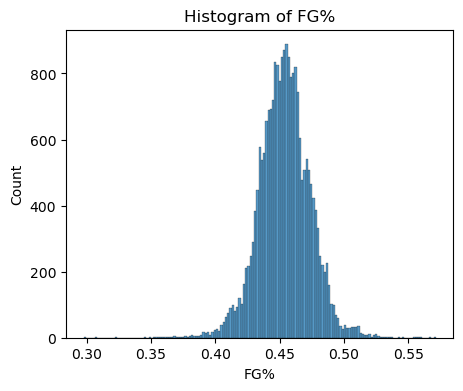

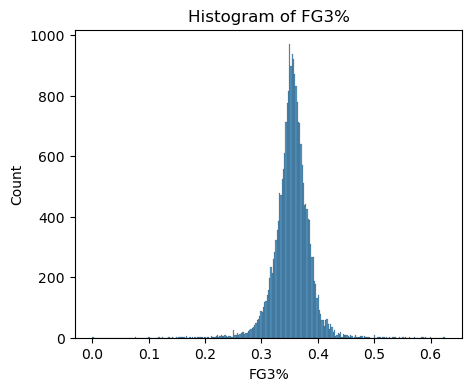

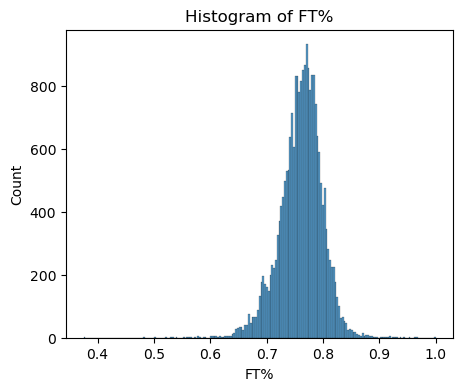

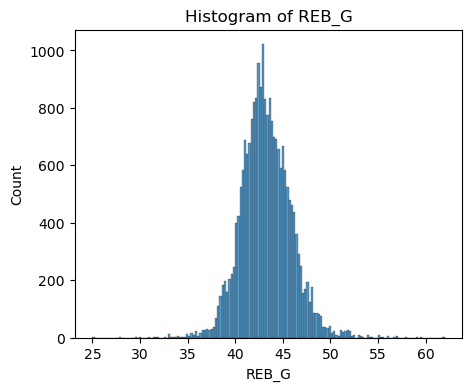

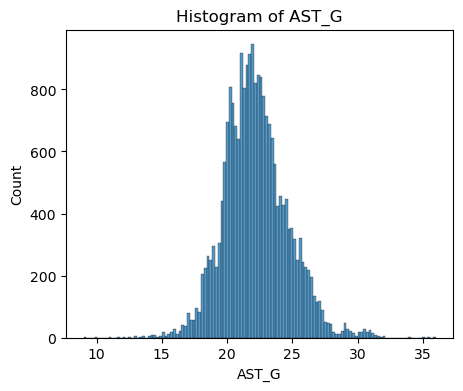

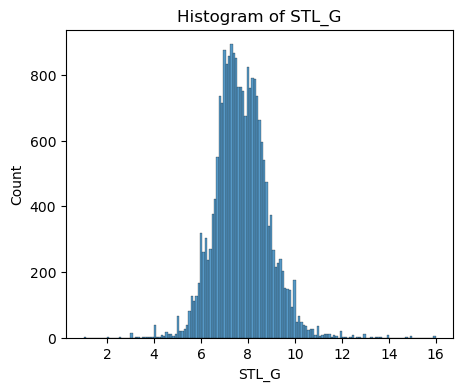

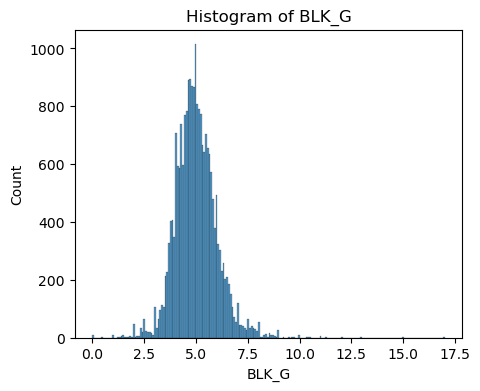

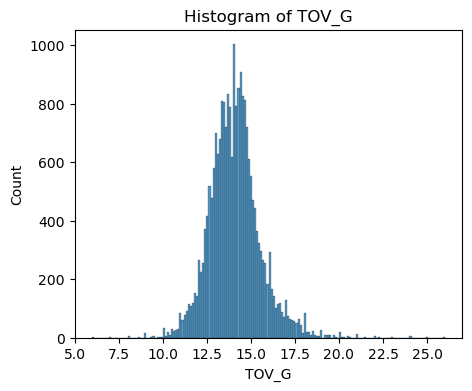

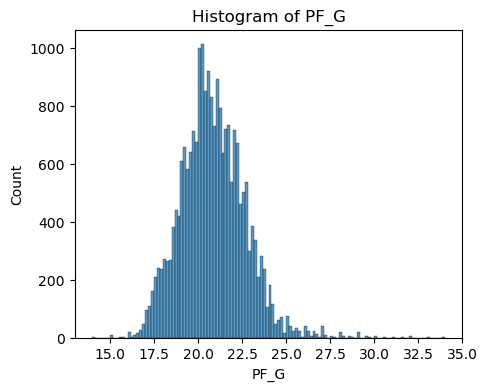

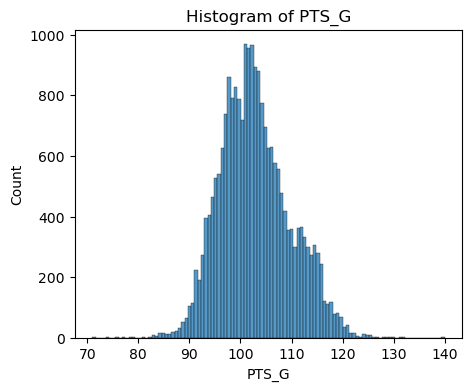

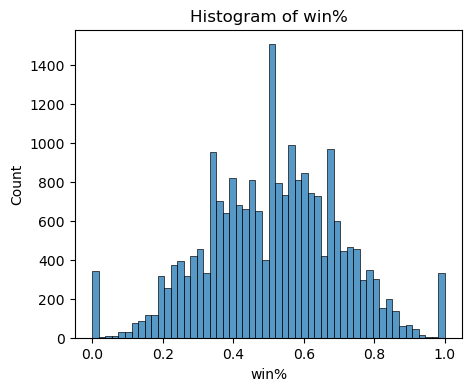

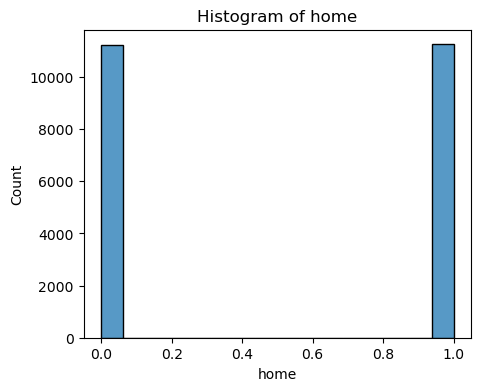

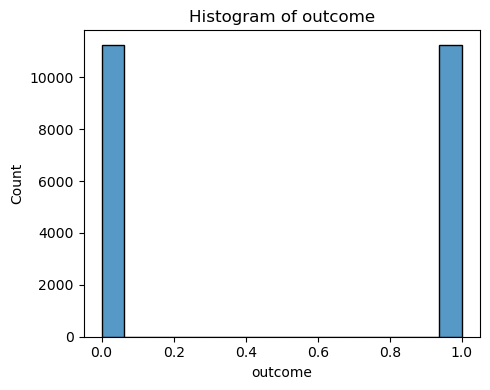

In [9]:
t = train_data.copy()
for col in t.columns:
    if 'opp' in col:
        t = t.drop(col, axis = 1)

num_vars = t.shape[1]

# Create a figure with a subplot for each variable
fig, axes = plt.subplots(1, num_vars, figsize=(10 * num_vars, 6))  # Adjust the figsize as needed

t.columns = [col.replace('/', '_') for col in t.columns]

# Plot a histogram on each subplot
for i, col in enumerate(t.columns):
    plt.figure(figsize=(5, 4))  # Set the size of the figure
    sns.histplot(t[col], kde=False)  # Create histogram, kde=False to not plot a kernel density estimate
    plt.title(f'Histogram of {col}')  # Title of the histogram
    plt.xlabel(col)  # Set x-axis label
    plt.ylabel('Count')  # Set y-axis label
    plt.savefig(f'{folder_path}/{col}_histogram.png', dpi=500, bbox_inches='tight')  # Modify this line

# Display the plot
plt.tight_layout()
plt.show()

In [10]:
stats.isna().sum()[2:]

Season       0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%         59
3P           0
3PA          0
3P%       1149
2P           0
2PA          0
2P%        120
eFG%        59
FT           0
FTA          0
FT%        518
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
dtype: int64